# *k*-Means Clustering

Here we will try using a *k*-means clustering on the Old Faithful geyser data. The data set is provided [here](http://www.stat.cmu.edu/~larry/all-of-statistics/=data/faithful.dat).

![Old Faithful Geyser](images/wyoming-old-faithful.jpg "Old Faithful Geyser")
<div style="text-align: center;">
Credit: http://www.destination360.com/north-america/us/wyoming/yellowstone-national-park/old-faithful
</div>

In [1]:
%matplotlib inline

import csv
import numpy as np
from matplotlib import pyplot
from sklearn import cluster

We first download the CSV file then store the dta in a Numpy array.

In [2]:
data = []
with open('old_faithful_geyser_data.csv', 'r') as csvfile:
    csvfile.readline()
    for line in csvfile:
        eruption_time, waiting_time = str(line).split(',')
        data.append([float(eruption_time), float(waiting_time)])

data = np.array(data)

Try plotting the data.

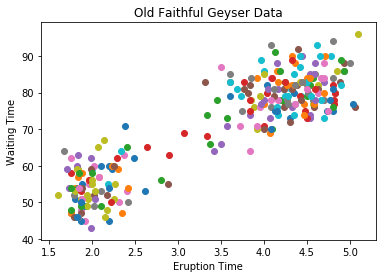

In [3]:
for eruption_time, waiting_time in data:
    pyplot.scatter(eruption_time, waiting_time)

pyplot.title('Old Faithful Geyser Data')
pyplot.xlabel('Eruption Time')
pyplot.ylabel('Waiting Time')
pyplot.show()

From the plot, we can see that the data can be divided into 2 main groups. Therefore, we will try using `k = 2` for our *k*-means model.

In [21]:
k = 2
kmeans = cluster.KMeans(n_clusters=k)
kmeans.fit(data)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=2, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

After we model the data, we can get the centroid of each cluster as follows:

In [23]:
centroids = kmeans.cluster_centers_

print(centroids)

[[  4.29793023  80.28488372]
 [  2.09433     54.75      ]]


From our *k*-means model we just built, we can see the labels to which each data point is assigned.

In [24]:
labels = kmeans.predict(data)

print(labels)

[0 1 0 1 0 1 0 0 1 0 1 0 0 1 0 1 1 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1
 0 1 0 0 1 0 1 0 0 1 1 0 1 0 0 1 0 1 0 0 1 0 0 1 0 1 0 1 0 0 0 1 0 0 1 0 0
 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 1 0 1 0 0 0
 1 0 0 1 0 1 0 1 0 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 1 0 0 0 1 0 1
 0 1 0 0 1 0 0 0 0 0 1 0 1 0 1 0 1 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 1
 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 1 0 1 0 1 0
 1 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 1 0 1 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1
 0 0 0 1 0 1 1 0 0 1 0 1 0]


Later on, we can visualize the data based on the label information we have.

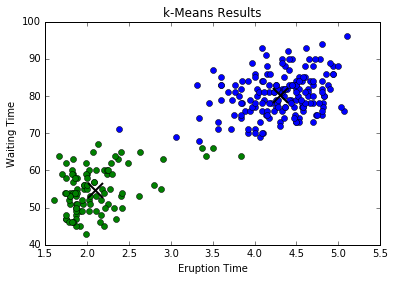

In [26]:
for each in range(k):
    selected_data = data[np.where(labels==each)]
    pyplot.plot(selected_data[:, 0], selected_data[:, 1], 'o')
    lines = pyplot.plot(centroids[each, 0], centroids[each, 1], 'kx')
    pyplot.setp(lines, markersize=15.0, markeredgewidth=2.0)

pyplot.title('k-Means Results')
pyplot.xlabel('Eruption Time')
pyplot.ylabel('Waiting Time')
pyplot.show()